In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('../cleaned_data_final.csv')

# Transforming the data so that each row contains one response and one label
responses = data['Human_response'].tolist() + data['ChatGPT_3_5_response'].tolist()
labels = [0] * len(data['Human_response']) + [1] * len(data['ChatGPT_3_5_response'])
data_combined = pd.DataFrame({'response': responses, 'label': labels})

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data_combined['response'], data_combined['label'], test_size=0.2, random_state=42)

# Text vectorization
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Training the model (without using the X_test and y_test)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_vectorized, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_vectorized, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

print("Cross-validation Scores:", cv_scores)
print("Average Cross-validation Accuracy:", cv_scores.mean())

# The test set for final evaluation
X_test_vectorized = vectorizer.transform(X_test)
predictions = model.predict(X_test_vectorized)
print("Test Set Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))



Cross-validation Scores: [0.8625   0.871875 0.871875 0.8625   0.865625]
Average Cross-validation Accuracy: 0.866875
Test Set Accuracy: 0.905
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       199
           1       0.94      0.87      0.90       201

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.90       400
weighted avg       0.91      0.91      0.90       400



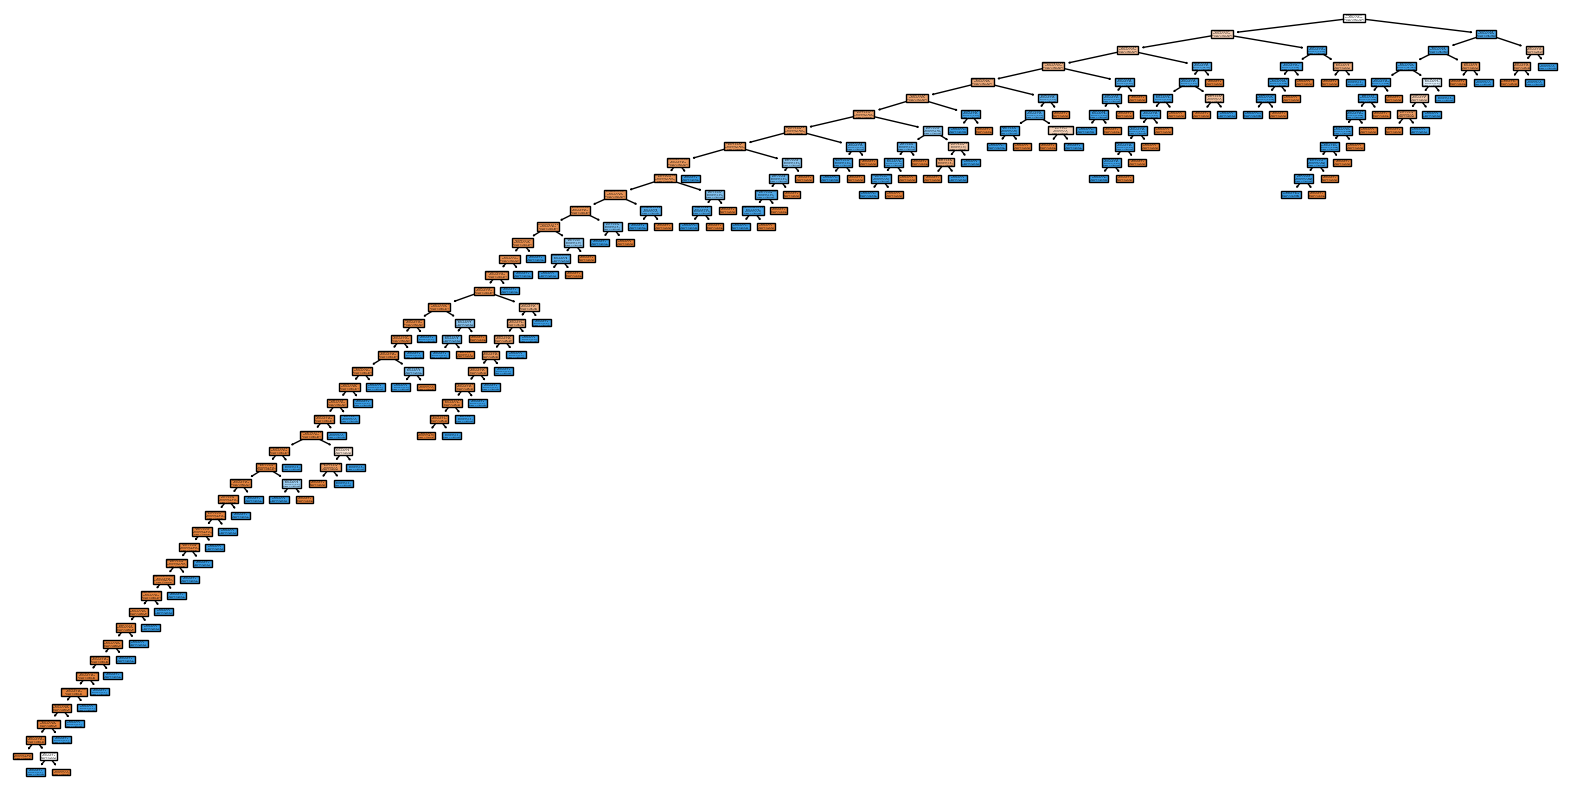

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=vectorizer.get_feature_names_out(), class_names=['Human', 'ChatGPT'], filled=True)
plt.savefig('decision_tree.pdf', format='pdf')
plt.show()

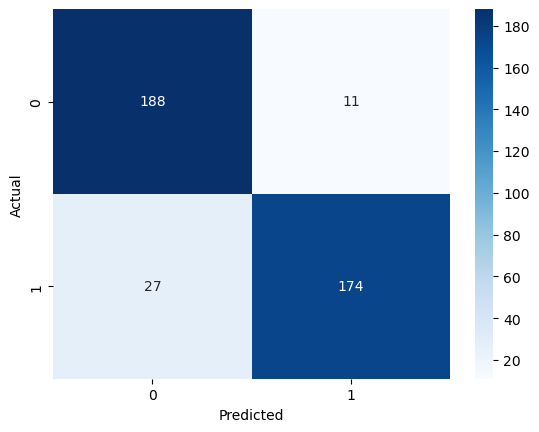

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [7]:
import numpy as np
# Find misclassified examples
misclassified = np.where(y_test != predictions)[0]

# Print some misclassified examples
for index in misclassified[:5]:
    print("Actual Label:", y_test.iloc[index])
    print("Predicted Label:", predictions[index])
    print("Text:", X_test.iloc[index])
    print("---" * 20)


Actual Label: 1
Predicted Label: 0
Text: publisher privilege working numerous challenging unique print jobs throughout career however believe project presents set difficulties requirements whether printing book never printed creating unique binding cover working new innovative printing techniques job requires attention detail expertise commitment quality said particularly memorable demanding projects include printing giant book sistine chapel creating three volume book set karl lagerfeld collaborating artists like ed ruscha gerhard richter print projects
------------------------------------------------------------
Actual Label: 0
Predicted Label: 1
Text: sure still little science geek kid love filmmaking came along later life find deeply satisfying heart explorer expedition driving robot water exploring titanic sub going deepest places planet whether go personally whether sending robotic vehicle surrogate eyes either way technical challenge love technical challenge love solving hard pr